Name:  

    SEAC4RS_AOD_profile

Purpose:  

    Python script for plotting boundary layer AOD profile

Calling Sequence:

    python SEAC4RS_AOD_profile
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - os
    - datetime
    - mpl_toolkits
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
    - Basemap
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures

Modification History:

    Written: Samuel LeBlanc, NASA Ames, 2015-10-09

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib notebook
from mpltools import color
import numpy as np
import scipy.io as sio
import math
import os
import Sp_parameters as Sp

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [1]:
from load_utils import mat2py_time, toutc

In [3]:
# set the basic directory path
fp='C:\\Users\\sleblan2\\Research\\SEAC4RS\\'

# Load the 4STAR starsun file

In [4]:
star = sio.loadmat(fp+'dc8\\20130816\\20130816starsun_R2.mat',variable_names=('w','tau_aero','t','Alt','Lat','Lon'))

In [4]:
star

{'Alt': array([[-5.9],
        [-6.1],
        [-6.1],
        ..., 
        [-6.5],
        [-6.5],
        [-6.4]]), 'Lat': array([[ 29.6091],
        [ 29.6091],
        [ 29.6091],
        ..., 
        [ 29.6053],
        [ 29.6054],
        [ 29.6054]]), 'Lon': array([[-95.1683],
        [-95.1683],
        [-95.1683],
        ..., 
        [-95.1665],
        [-95.1665],
        [-95.1665]]), '__globals__': [], '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Aug 26 20:11:38 2015', '__version__': '1.0', 't': array([[ 735462.53499764],
        [ 735462.53502315],
        [ 735462.53503508],
        ..., 
        [ 735462.96053078],
        [ 735462.9605447 ],
        [ 735462.96055862]]), 'tau_aero': array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  

In [5]:
star.keys()

['Lon',
 '__header__',
 'tau_aero',
 '__globals__',
 't',
 'w',
 'Lat',
 'Alt',
 '__version__']

In [36]:
star['tt'] = mat2py_time(star['t'])
star['utc'] = toutc(star['tt'])

<IPython.core.display.Javascript object>


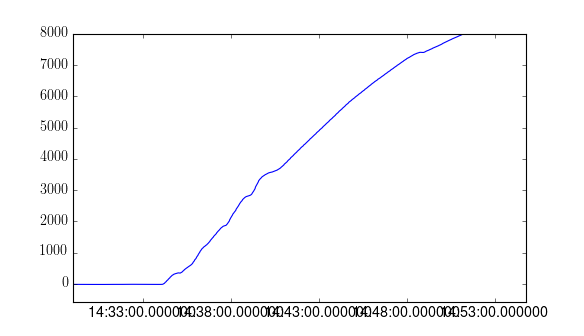

In [66]:
plt.figure()
plt.plot(star['tt'],star['Alt'])

In [101]:
it = (star['utc']>14.5)&(star['utc']<14.8)

<IPython.core.display.Javascript object>


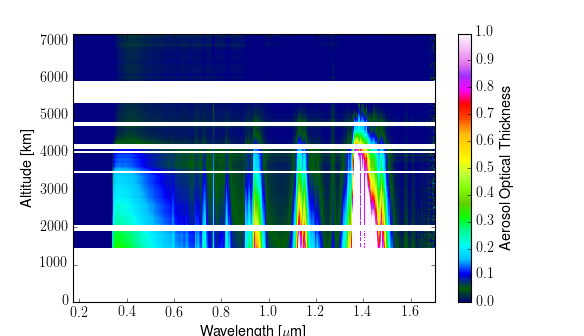

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cb = ax.pcolorfast(star['w'].flatten(),star['Alt'][it].flatten(),star['tau_aero'][it,:][:-1,:-1],
                   cmap='gist_ncar',vmin=0,vmax=1.0)
axc = plt.colorbar(cb)
axc.set_label('Aerosol Optical Thickness')
ax.set_ylabel('Altitude [km]')
ax.set_xlabel('Wavelength [$\mu$m]')

In [113]:
i515 = np.argmin(np.abs(star['w']-0.515))

In [142]:
ii = np.where((star['Alt']>2100)&(star['utc']<14.75))[0][1]

In [143]:
ii

5565

<IPython.core.display.Javascript object>


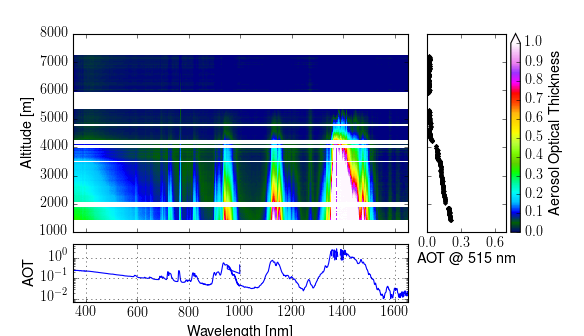

In [163]:
fig = plt.figure()
ax = plt.subplot2grid((4,4),(0,0),colspan=3,rowspan=3)
cb = ax.pcolorfast(star['w'].flatten()*1000.0,star['Alt'][it].flatten(),star['tau_aero'][it,:][:-1,:-1],
                   cmap='gist_ncar',vmin=0,vmax=1.0)
ax2 = plt.subplot2grid((4,4),(0,3),sharey=ax,rowspan=3)
ax2.plot(star['tau_aero'][it,i515],star['Alt'][it],'k.-')
axc = plt.colorbar(cb,extend='max')
axc.set_label('Aerosol Optical Thickness')
ax.set_ylabel('Altitude [m]')
ax.set_ylim([1000,8000])
plt.setp(ax2.get_yticklabels(), visible=False)
ax2.set_xticks([0.0,0.3,0.6])
ax2.set_xlabel('AOT @ 515 nm')

ax3 = plt.subplot2grid((4,4),(3,0),sharex=ax,colspan=3)
ax3.semilogy(star['w'].flatten()*1000.0,star['tau_aero'][ii,:].flatten())
ax.set_xlim([350,1650])
ax3.set_ylim([0,5.0])
ax3.grid()
ax3.set_xlabel('Wavelength [nm]')
ax3.set_ylabel('AOT')
plt.setp(ax.get_xticklabels(), visible=False)
plt.savefig(fp+'plots\\AOD_Alt_profile_20130816.png',dpi=600,transparent=True)

In [164]:
star['Alt'][ii]

array([ 2105.7])

<IPython.core.display.Javascript object>


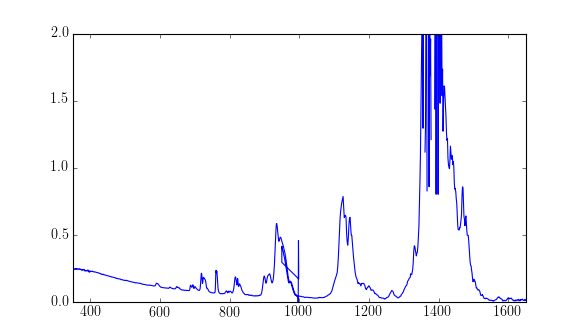

(0, 2.0)

In [148]:
plt.figure()
plt.plot(star['w'].flatten()*1000.0,star['tau_aero'][ii,:].flatten())
plt.xlim([350,1650])
plt.ylim([0,2.0])

<IPython.core.display.Javascript object>


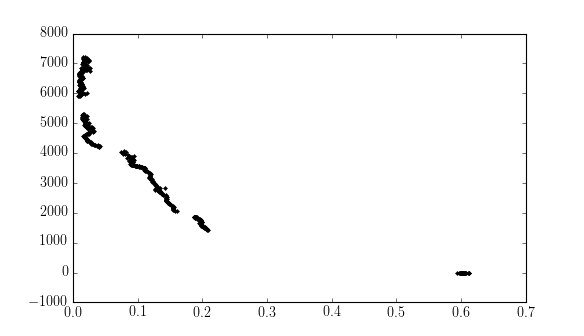

In [117]:
plt.figure()
plt.plot(star['tau_aero'][it,i515],star['Alt'][it],'k.')

In [165]:
from mpl_toolkits.basemap import Basemap,cm

In [167]:
star.keys()

['utc',
 'tt',
 'Lon',
 '__header__',
 'tau_aero',
 '__globals__',
 't',
 'w',
 'Lat',
 'Alt',
 '__version__']

<IPython.core.display.Javascript object>


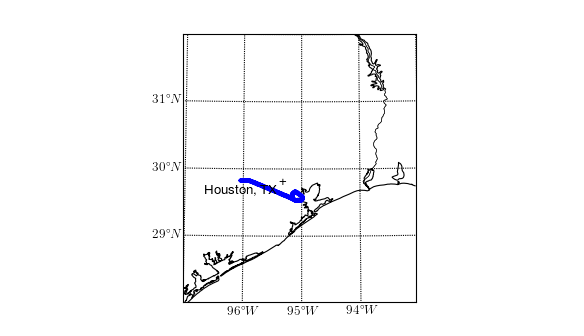

In [172]:
fig,ax = plt.subplots(1,1)
m = Basemap(projection='stere',lon_0=-95,lat_0=30,
            llcrnrlon=-97, llcrnrlat=28,
            urcrnrlon=-93, urcrnrlat=32,resolution='h',ax=ax)
m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
m.drawstates()
m.drawcountries()
m.drawmeridians([-93,-94,-95,-96,-97,-98],labels=[0,0,0,1])
m.drawparallels([26,27,28,29,30,31,32,33],labels=[1,0,0,0])
xt,yt = m(-95.3831,29.7628)
ax.text(xt,yt,'+')
ax.text(xt,yt,'Houston, TX',horizontalalignment='right',verticalalignment='top')
m.plot(star['Lon'][it],star['Lat'][it],'b.',latlon=True)
plt.savefig(fp+'plots\\map_take_off_profile_20130816.png',dpi=600,transparent=True)

In [173]:
import map_utils as mu

In [180]:
pos1,pos2 = [star['Lat'][it][0][0],star['Lon'][it][0][0]],[star['Lat'][it][-1][0],star['Lon'][it][-1][0]]

In [182]:
mu.spherical_dist(pos1,pos2)

90.352758226228616